## Till Nemolcev Exercise 1 

This is an illustrative example for solving the time-dependent Schroedinger equation in Python. We consider the simple case of a driven two-level atom with states $|e\rangle$ and $|g\rangle$ and Hamilton operator  

$$
H=\omega_{eg} |e\rangle\langle e|+\Omega \left(|g\rangle\langle e| +|e\rangle\langle g|\right)\cos(\omega_L t).
$$

Here $\omega_L$ is the driving (laser) frequency and $\Omega$ is the Rabi-frequency.


In [2]:
#importing modules and functions

import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time

from qutip import Qobj   # use Qobj(A) to generate a better readable output of a matrix or vector A

np.set_printoptions(precision=3)

#nicer latex fonts in plots:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
}) 

### Parameters, Hamiltonian and initial state:

In [3]:
# Parameters

weg=1 #\omega_eg 
Omega=0.2  # Rabi frequency
wL=weg + 0.1  # resonant driving

#Hamilton operator (2x2 matrix)

H0=np.array([[0,0],[0,weg]])
Hdrive=Omega*np.array([[0,1],[1,0]])

#initial state 
d=2 #Hilbertspace dimension
psi0=np.zeros(d,dtype=np.complex64)  # define as complex  
psi0[0]=1  # ground state

Qobj(H0)
Qobj(Hdrive)
#Qobj(psi0)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.2]
 [0.2 0. ]]

### Time evolution:

We first specify the function that returns the time derivative of $|\psi\rangle$ at a given time $t$. In our example, this derivative is given by the SE

$$
\dot{\vec \psi} = -i \left[H_0+H_{\rm drive} \cos(\omega_d t)\right] \vec \psi.
$$

In [4]:
def psidot(t,psi,H0,Hdrive,wL):
    
    H=H0+Hdrive*np.cos(wL*t)
    
    return -1j*H.dot(psi)

Next we use the scipy function solve_ivp to integrate the SE:

In [5]:
tsteps= 301
t_span = np.linspace(0,20*np.pi,tsteps)    #time grid for the solution    

sol=solve_ivp(psidot,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H0,Hdrive,wL]) 

psi_t=sol.y  # sol.t contains the time points and sol.y the values of psi at these time 

and plot the results ...

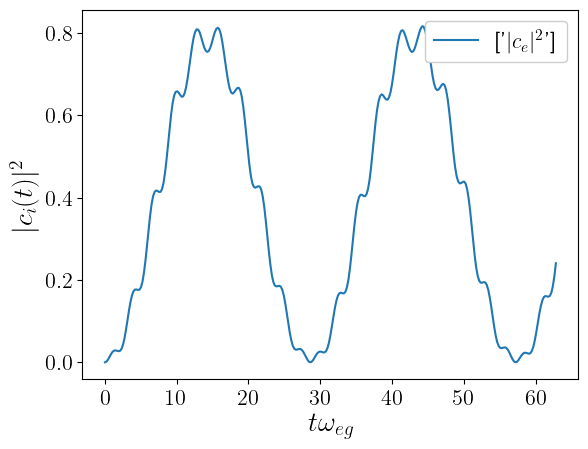

In [6]:
#Plot results:
plt.figure(dpi = 100)
plt.plot(t_span,np.abs(psi_t[1].T)**2,label=[r'$|c_e|^2$'])
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_i(t)|^2$ ', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper right', fontsize=16,facecolor='white',framealpha=1)
plt.show()

Often we are interest in the expectation values of operators during the time evolution, i.e,

$$
\langle O\rangle (t)= \langle \psi(t)| O | \psi(t)\rangle
$$

Given the solution from solve_ivp, there are different ways to calculate the corresponding array of mean values:

In [7]:
O=np.array([[0,1],[1,0]]) #oberservable (in this case the Pauli operator \sigma_y

O_mean=np.zeros(tsteps,dtype=np.complex64)

# Method 1: for loop 
psi_t=sol.y
for x in range(tsteps):
    
    O_mean[x]= psi_t[:,x].conj().T @ O @ psi_t[:,x] 
    

# Methode 2: more elegant for-loop (although slightly slower)
psi_t=sol.y.T
O_mean=np.array([psi.conj().T @ O @ psi for psi in psi_t])


# Methode 3: make use of intrinsic parallelization of ndarray operations  (fastest)   
psi_t=sol.y
O_mean= np.diag(psi_t.conj().T @ O @ psi_t) 


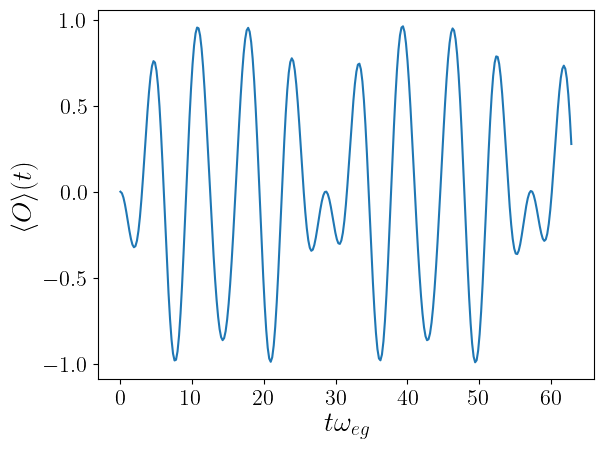

In [8]:
#Plot results:
plt.figure(dpi = 100)
plt.plot(t_span,np.real(O_mean))
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$\langle O\rangle(t)$ ', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [9]:
# Second Hamiltonian

import numpy as np
import scipy.linalg

detuning = weg - wL
  # Assuming a value for Omega

H_RWA = -detuning * np.array([[0,0],[0,1]]) + Omega/2 * np.array([[0,1],[1,0]])

def U(t):
    return scipy.linalg.expm(-1j * H_RWA * t)  # Use proper matrix exponential

def psi(t):
    psi_0 = np.array([1,0])
    return U(t) @ psi_0

def p_e(t):
    return np.abs(np.array([0,1]).conj().T @ psi(t))**2

tsteps= 301
t_span = np.linspace(0,20*np.pi,tsteps)  
y_vals = np.zeros(tsteps)

for i, t in enumerate(t_span):
    y_vals[i] = p_e(t)



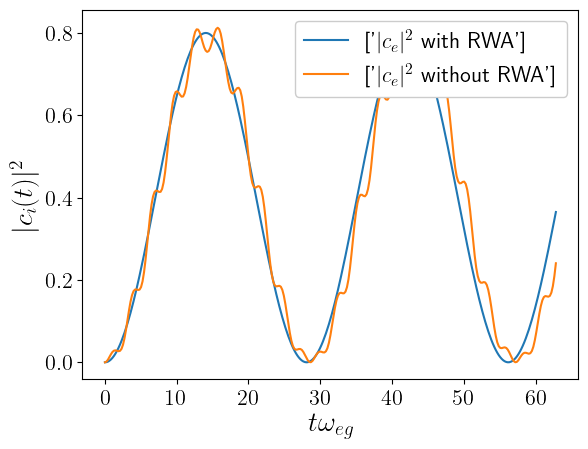

In [10]:
#Plot results:
plt.figure(dpi = 100)
plt.plot(t_span, y_vals, label=[r'$|c_e|^2$ with RWA'])
plt.plot(t_span,np.abs(psi_t[1].T)**2,label=[r'$|c_e|^2$ without RWA'])
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_i(t)|^2$ ', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper right', fontsize=16,facecolor='white',framealpha=1)
plt.show()

#overall dynamics remain the same, thus the RWA is a good approximation for the system.



## Till Nemolcev Exercise 2

Part a) and b)

[[1.   +0.000e+00j 0.988-3.902e-03j 0.952-7.803e-03j ... 0.765+2.579e-01j
  0.844+2.755e-01j 0.902+2.884e-01j]
 [0.988+3.902e-03j 1.   +1.079e-19j 0.893-4.646e-03j ... 0.841+2.814e-01j
  0.765+2.579e-01j 0.935+3.031e-01j]
 [0.952+7.803e-03j 0.893+4.646e-03j 1.   -1.597e-19j ... 0.551+2.098e-01j
  0.929+3.060e-01j 0.765+2.579e-01j]
 ...
 [0.765-2.579e-01j 0.841-2.814e-01j 0.551-2.098e-01j ... 0.995+1.948e-18j
  0.463-1.119e-02j 0.947-7.700e-03j]
 [0.844-2.755e-01j 0.765-2.579e-01j 0.929-3.060e-01j ... 0.463+1.119e-02j
  0.995+1.386e-17j 0.708-1.054e-02j]
 [0.902-2.884e-01j 0.935-3.031e-01j 0.765-2.579e-01j ... 0.947+7.700e-03j
  0.708+1.054e-02j 0.995+0.000e+00j]]


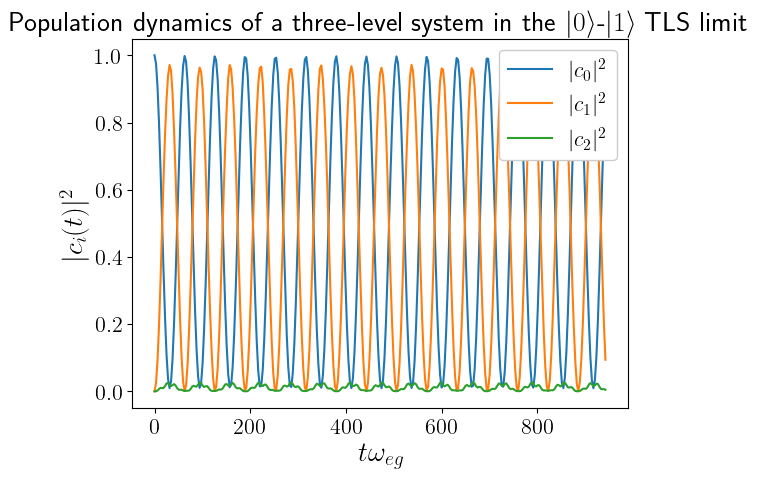

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
Unterschied = 0.4
w1 = 1
w2 = 2 * w1 + Unterschied
wdrive = 1
Omega = 0.1

# Hamiltonians
H0 = np.array([[0, 0, 0], [0, w1, 0], [0, 0, w2]])
Hdrive = Omega * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

# Initial state
psi0 = np.array([1, 0, 0], dtype=complex)

# Function defining the Schrödinger equation
def psidot(t, psi, H0, Hdrive, wdrive):
    H = H0 + Hdrive * np.cos(wdrive * t)
    return -1j * H @ psi

# Time span
tsteps = 301
t_span = np.linspace(0, 300 * np.pi, tsteps)

# Solve the system
sol = solve_ivp(psidot, (t_span[0], t_span[-1]), psi0, t_eval=t_span, args=(H0, Hdrive, wdrive))

# Extract solutions
psi_t = sol.y

print(psi_t.conjugate().T @ psi_t)
# Plot results
plt.figure(dpi=100)
plt.plot(t_span, np.abs(psi_t[0])**2, label=r'$|c_0|^2$')
plt.plot(t_span, np.abs(psi_t[1])**2, label=r'$|c_1|^2$')
plt.plot(t_span, np.abs(psi_t[2])**2, label=r'$|c_2|^2$')
#plt.plot(t_span, np.cos(Omega**2 /Unterschied*2 * t_span)**2, label=r'$cos^2(\Omega_{eff}t)$')
plt.title(r'Population dynamics of a three-level system in the $\vert 0\rangle$-$\vert 1\rangle$ TLS limit', fontsize=20)
plt.xlabel(r'$t\omega_{eg}$', fontsize=20)
plt.ylabel(r'$|c_i(t)|^2$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper right', fontsize=16, facecolor='white', framealpha=1)
plt.show()

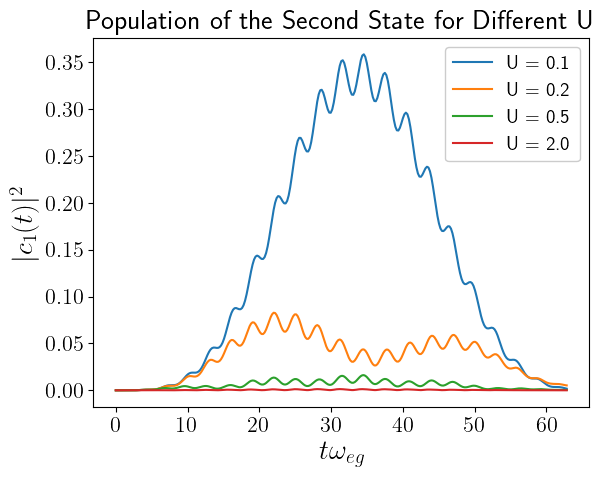

In [12]:

# Different values for Unterschied
Unterschied_values = [0.1, 0.2, 0.5, 2.0]

# Plot results
plt.figure(dpi=100)

for Unterschied in Unterschied_values:
    w2 = 2 * w1 + Unterschied

    # Define Hamiltonians
    H0 = np.array([[0, 0, 0], [0, w1, 0], [0, 0, w2]])
    Hdrive = Omega * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

    # Solve the system
    sol = solve_ivp(psidot, (t_span[0], t_span[-1]), psi0, t_eval=t_span, args=(H0, Hdrive, wdrive), method="BDF")

    # Extract solutions
    psi_t = sol.y
    population_2 = np.abs(psi_t[2])**2  # Population of the second state

    # Plot population dynamics for different Unterschied values
    plt.plot(t_span, population_2, label=f'U = {Unterschied}')

# Labels and formatting
plt.xlabel(r'$t\omega_{eg}$', fontsize=20)
plt.ylabel(r'$|c_1(t)|^2$', fontsize=20)
plt.title('Population of the Second State for Different U', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper right', fontsize=14, facecolor='white', framealpha=1)
plt.show()

We can see a clear TLS behaviour in this regime, which a negligable population of the third state.

Part c):

[[ 1.000e+00+0.000e+00j  9.998e-01-9.585e-04j  1.000e+00-1.899e-03j ...
   9.686e-01-1.557e-01j  9.299e-01-5.347e-02j  1.049e+00-2.828e-02j]
 [ 9.998e-01+9.585e-04j  1.000e+00-2.677e-20j  9.998e-01-9.207e-04j ...
   8.551e-01+2.874e-02j  1.112e+00-8.745e-02j  8.591e-01-2.076e-01j]
 [ 1.000e+00+1.899e-03j  9.998e-01+9.207e-04j  1.000e+00-9.150e-20j ...
   1.054e+00-4.287e-01j  6.383e-01+7.915e-02j  1.368e+00+1.249e-01j]
 ...
 [ 9.686e-01+1.557e-01j  8.551e-01-2.874e-02j  1.054e+00+4.287e-01j ...
   2.145e+04+0.000e+00j -1.556e+04-1.798e+04j -3.771e+03+2.608e+04j]
 [ 9.299e-01+5.347e-02j  1.112e+00+8.745e-02j  6.383e-01-7.915e-02j ...
  -1.556e+04+1.798e+04j  2.637e+04+0.000e+00j -1.912e+04-2.208e+04j]
 [ 1.049e+00+2.828e-02j  8.591e-01+2.076e-01j  1.368e+00-1.249e-01j ...
  -3.771e+03-2.608e+04j -1.912e+04+2.208e+04j  3.237e+04+0.000e+00j]]


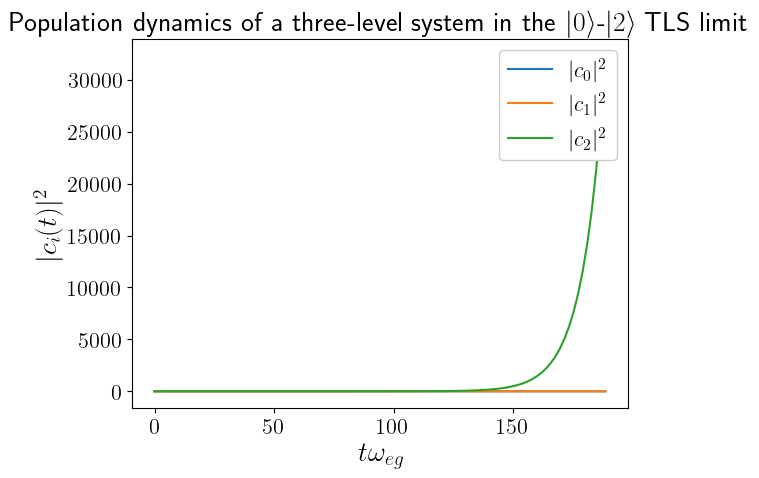

In [24]:

# WRONG

# Parameters
Unterschied = 10
w1 = 1000
w2 = 2 * w1 + Unterschied
wdrive = w2/2
Omega = 0.1

# Hamiltonians
H0 = np.array([[0, 0, 0], [0, w1, 0], [0, 0, w2]])
Hdrive = Omega * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

# Initial state
psi0 = np.array([1, 0, 0], dtype=complex)

# Function defining the Schrödinger equation
def psidot(t, psi, H0, Hdrive, wdrive):
    H = H0 + Hdrive * np.cos(wdrive * t)
    return -1j * H @ psi

# Time span
tsteps = 100
t_span = np.linspace(0, 60 * np.pi, tsteps)

# Solve the system
sol = solve_ivp(psidot, (t_span[0], t_span[-1]), psi0, t_eval=t_span, args=(H0, Hdrive, wdrive))

# Extract solutions
psi_t = sol.y

print(psi_t.conjugate().T @ psi_t)
# Plot results
plt.figure(dpi=100)
plt.plot(t_span, np.abs(psi_t[0])**2, label=r'$|c_0|^2$')
plt.plot(t_span, np.abs(psi_t[1])**2, label=r'$|c_1|^2$')
plt.plot(t_span, np.abs(psi_t[2])**2, label=r'$|c_2|^2$')
#plt.plot(t_span, np.cos(Omega**2 /Unterschied*2 * t_span)**2, label=r'$cos^2(\Omega_{eff}t)$')
plt.title(r'Population dynamics of a three-level system in the $\vert 0\rangle$-$\vert 2\rangle$ TLS limit', fontsize=20)
plt.xlabel(r'$t\omega_{eg}$', fontsize=20)
plt.ylabel(r'$|c_i(t)|^2$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper right', fontsize=16, facecolor='white', framealpha=1)
plt.show()
